# Udacity Data Scientist Nanodegree - Project 1

## Business understanding

In this project, Seattle Airbnb Data is analyzed to understand the market dynamic and provide insight to current and potential Airbnb owners.

The entire data set consists of three sub data sets: listing info, calendar, and detailed review. These three data sets are consolidated by the listing to faciliate analysis.

A financial metric is defined herein to compare different properties:

Metric = Average Occupancy x Price 

## Questions

1. What factors in airbnb property affect financial income?
2. What factors in host affect financial income?
3. What factors in listing for affect financial income?

##  Data understanding

<br /> 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Load the data set and review column definition
calendar = pd.read_csv("./calendar.csv")
listings = pd.read_csv("./listings.csv")
reviews = pd.read_csv("./reviews.csv")

In [20]:
calendar.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


In [21]:
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


In [22]:
reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."


We have three individual data sets. It appears that these three data sets can be consolidated by column "id". The statistical info of the data set "review" is already included in "listing". The occupancy rate of Airbnb property can be extracted from the calendar data set, which is an importatn metric.

##  Data preparation

In [2]:
# Calculate occupancy rate for each listing_id
calendar['occupancy'] = calendar['available'].apply(lambda x: 1 if x == 't' else 0)
occupancy = calendar[['listing_id','occupancy']].groupby(by='listing_id').mean().reset_index()

# Add occupancy info into listing info
df = listings.merge(occupancy,how='left', left_on='id',right_on='listing_id')

# Add financial metric
df['price_num'] = df['price'].apply(lambda x: float(x.replace(",",'').replace("$",'')))

# Add financial metric
df['metric'] = df['occupancy'] * df['price_num']

# remove the effect of size by catagorizing accomondation number
df['accommodates_cat'] = df['accommodates'].apply(lambda x: "<=2" if x <= 2 else ("3 - 5"if x<=5 else ("6 to 10" if x<=10 else "10+")))

In [14]:
def data_vis(data,xcolumn,ycolumn,index_column):
    '''This function plot the data given the column for x, the column for y, and an index column'''
    for value in data[index_column].unique():
        temp = data[data[index_column]==value]
        plt.scatter(temp[xcolumn],temp[ycolumn],alpha=0.5,label=value)
        plt.legend()
        plt.xlabel(xcolumn)
        plt.ylabel(ycolumn)
        plt.show()

Since we are not applying any machinline learning algorithm and it is purely visualization, there is no need to remove *missing values* in the dataset.

## Data modeling

### Question#1 What factors in airbnb property affect financial income?

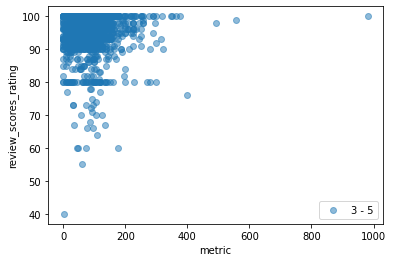

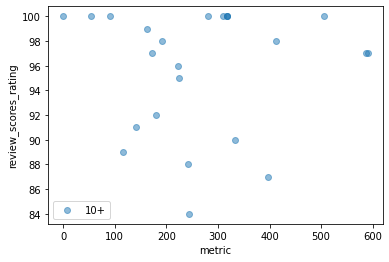

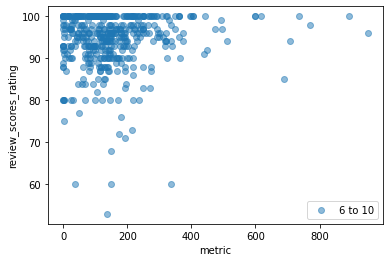

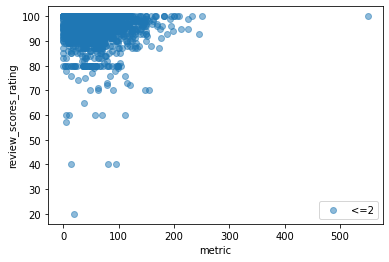

In [15]:
#1st step: visulize review vs price for different sizes
import matplotlib.pyplot as plt
data_vis(df,'metric','review_scores_rating','accommodates_cat')

From the plots above, it can be shown that there is a wide spread of metric vs review scores regardless property size. Hence, higher review scores do not directly suggest more favorable metric. Lower review scores, however, results in lower likelihood of greater metrics for one specific Airbnb Property, i.e.,  with distribution centered more toward lower metric. 

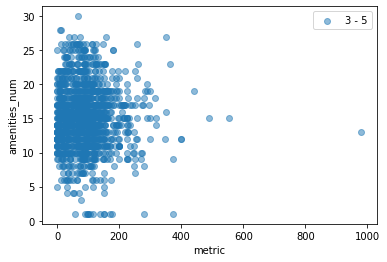

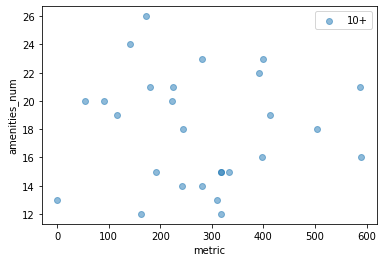

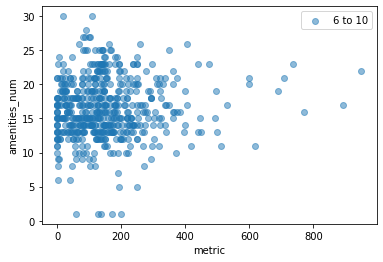

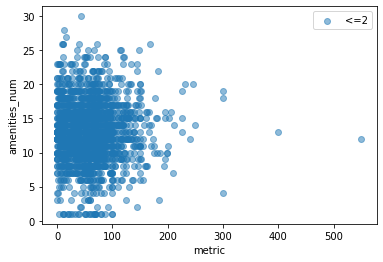

In [17]:
#2nd step: visulize review vs amenities for different sizes
import matplotlib.pyplot as plt

#count how many amenities in one property
df['amenities_num'] = df['amenities'].apply(lambda x: x.count(",") + 1)
data_vis(df,'metric','amenities_num','accommodates_cat')
    

The analysis suggests that there is no obvious linear correlation with number of amenities vs metric. Having more appliance or furnitures in the house does not directly help increase reveneue from an Airbnb property. 

In [30]:
#3rd step: Neighborhood vs Metric
table = pd.pivot_table(df, values='metric', index=['neighbourhood_group_cleansed'],
                    columns=['accommodates_cat'], aggfunc=np.average) 

table

accommodates_cat,10+,3 - 5,6 to 10,<=2
neighbourhood_group_cleansed,,,,
Ballard,236.397260,87.091438,159.991532,57.364167
Beacon Hill,396.813699,85.860365,101.631781,49.373478
Capitol Hill,321.890411,88.115737,180.301370,62.066036
Cascade,NaN,93.215264,295.445205,54.287443
Central Area,357.442922,92.728541,138.490544,58.618040
Delridge,NaN,72.009381,99.923288,53.821153
Downtown,NaN,101.427701,159.446119,72.179714
Interbay,NaN,179.360731,NaN,61.818151
Lake City,NaN,75.786693,168.854795,56.385952


The above table illustrates that location matters but it depends on the property size. For example, small-sized property in Magnolia has the highest metric but not so much for properties for 10+ occupants.

### Goal#2 What factors in host affect financial income?

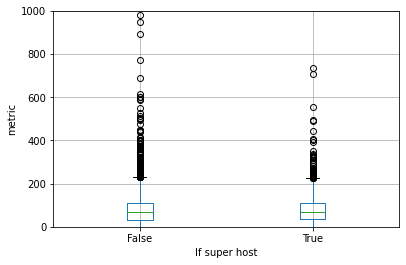

Mean of Metric for Super Host: 87.05
Mean of Metric for Non Super Host: 84.90


In [25]:
#1st step: visulize price vs superhost
df['super host'] = df['host_is_superhost'].apply(lambda x: True if x == 't' else False)
x = df.boxplot(column=['metric'],by='super host')
plt.ylim(0,1000)
plt.xlabel('If super host')
plt.ylabel('metric')
plt.title('')
plt.suptitle('')
plt.show()

print('Mean of Metric for Super Host: %.2f' % (df['metric'][df['super host']].mean()))
print('Mean of Metric for Non Super Host: %.2f' % (df['metric'][~df['super host']].mean()))

From the box plot, it can be seen that metric for super host is higher than non super host on average, confirmed by the numerical mean of metric for super host vs non super host.

### Goal#3 What factors in listing for affect financial income?

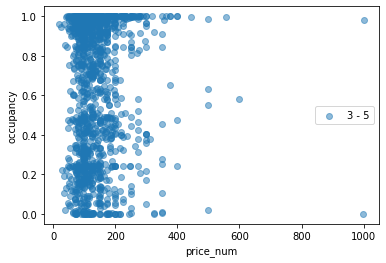

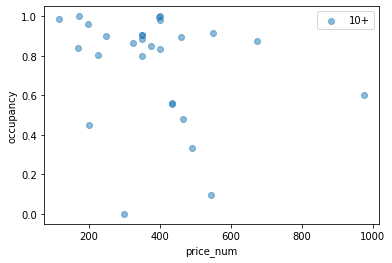

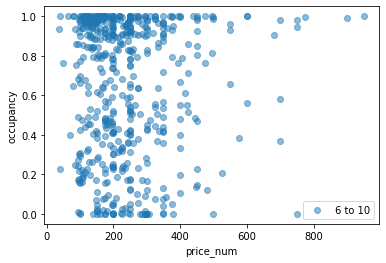

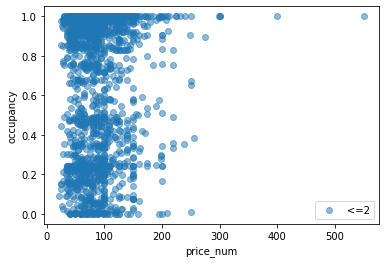

In [18]:
#1st step: price vs occupancy
data_vis(df,'price_num','occupancy','accommodates_cat')

There are no directly correlation between price and occupancy observed from the data, i.e., lowering the price does not improve the occupancy rate.

## Results evaluation:

In this notework, we analyze the Seattle Airbnb data and try to understand what factors affect the financial performance of a property:

**Property**： 
- High review does not mean better financial income but low review will likely to result in poor performance.
- Having more appliance or furnitures in the house does not directly help increase reveneue from an Airbnb property. 
- Location is the key to improve financial income. Location should be carefully selected depending on the property size.

**Host**： 
- Average revenue for super host is slightly higher (2.5%) than that of non super host.

**Listing Info**： 
- Lowering the price does not directly improve occupancy. 